In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as smf
import scipy.stats 
from scipy import stats

In [5]:
start_date= '2022-01-01'
end_date="2023-04-01"
tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA"]

ticker=["TSLA"]

In [6]:
def data_returns(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"].pct_change()).dropna())
       
    return returns

In [7]:
dat=data_returns(["BABA"],start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [8]:
#data=np.random.normal(0,1,1000)


In [9]:
def distribution_fit(data):
 from sklearn.metrics import r2_score
 y, x = np.histogram(data, bins=100, density=True)
 x = (x + np.roll(x, -1))[:-1] / 2.0
 list_loi = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2','rayleigh',"logistic","genextreme","weibull_max"]
 sse=[]
 rsq=[]
 best_distribution=[]

 for  i  in  range(len(list_loi)) :
    #modélisation
    loi=getattr(scipy.stats, list_loi[i])
    loi_fit=loi.fit(data)

    #parametres
    loc= loi_fit[-2]
    scale=loi_fit[-1]
    arg=loi_fit[:-2]

    #pdf
    pdf=loi.pdf(x, loc=loc,scale=scale, *arg)

    #Rmse
    sse=np.sum((y-pdf)**2)
    #R_squared
    rsq=round(r2_score(y,pdf),2)
    best_distribution.append([loi,loi_fit,sse,rsq,list_loi[i]])

 return sorted(best_distribution, key=lambda x:x[2])
 


In [10]:
scipy.stats.norm.fit(dat)[:-2]

()

In [11]:
"""Generate distributions's Probability Distribution Function """
def make_pdf(dist, params, size=10000):
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)
    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)
    return pdf

In [12]:
def parm(modele):
    return [modele[-1], modele[1]]


In [13]:
def ks_test(modele,title):
    kstest=pd.DataFrame()

    for i in range(len(modele)):
       kstest[modele[i][-1]]=stats.kstest(title, modele[i][-1] ,args=(modele[i][1]))
    return kstest





In [14]:

tick=["NCPL","DHIL", "GROW", "VALU", "NMIH", "ACT", "SEIC", "WAFD", "MKTX",'CRVL', " ERIE","FANH","TW",'SNEX', " HGBL"]

In [15]:


tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA", "^IXIC", "^TNX"]


tech=data_returns(tick,"2023-01-01","2023-04-01")

stats.kstest(tech["GC=F"],'t',args=( (3.0295110611565326, 0.0009095407238531756, 0.006570758729865104)))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

KeyError: 'GC=F'

In [ ]:
ks_test(distribution_fit(tech["GC=F"]),tech["GC=F"])

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


,t,logistic,lognorm,gamma,beta,norm,alpha,loggamma,invgamma,invgauss,genextreme,rayleigh,pareto,chi,chi2,weibull_max
0,0.063170,0.081347,0.110523,0.111585,0.110469,0.111335,0.120279,0.111773,0.120024,0.133328,0.120995,0.282876,4.099947e-01,5.032771e-01,4.943229e-01,4.920619e-01
1,0.955257,0.783945,0.415450,0.403664,0.416060,0.406423,0.315004,0.401607,0.317395,0.208780,0.308341,0.000082,8.693129e-10,7.954771e-15,2.759167e-14,3.759885e-14


In [ ]:
stats.kstest(tech["GC=F"],'t',args=( (3.0295110611565326, 0.0009095407238531756, 0.006570758729865104)))

KstestResult(statistic=0.0631698268410228, pvalue=0.9552568979876569)

In [ ]:

distribution_fit(tech["GC=F"])[0]

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


 (3.0295110611565326, 0.0009095407238531756, 0.006570758729865104),
 62502.61164090412,
 0.33,
 't']

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: inva

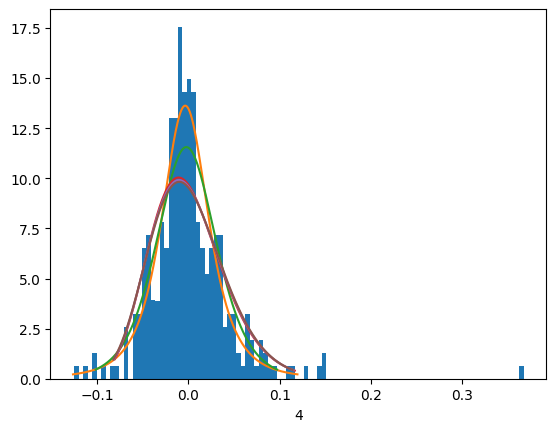

In [16]:
y, x = np.histogram(dat, bins=10000, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

plt.hist(dat, bins=100, density=True)
for i in range(5):
   pdf_=make_pdf(distribution_fit(dat)[i][0],distribution_fit(dat)[i][1])
   plt.plot(pdf_)
   plt.xlabel(i)
plt.show()

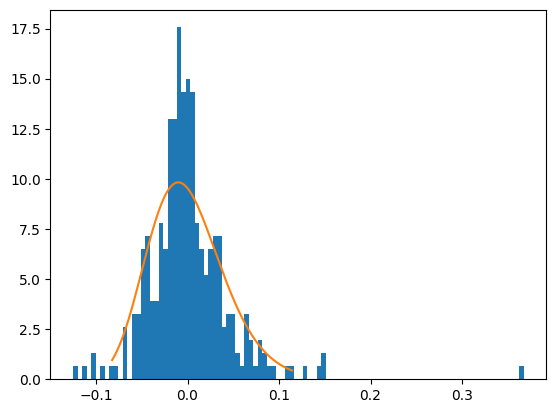

In [ ]:
y, x = np.histogram(dat, bins=10000, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

plt.hist(dat, bins=100, density=True)
#plt.plot(x,y)
plt.plot(pdf_)


In [ ]:
def generate_distribution(dist, params, size=10):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    return dist.rvs(loc=loc, *arg,scale=scale, size=size ) if arg else dist.rvs(loc=loc, scale=scale, size=size)

generate_distribution(distribution_fit(dat)[0][0],distribution_fit(dat)[0][1])


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: inva

array([ 0.01754361,  0.01749866,  0.00431177, -0.02450983, -0.00574433,
       -0.03179746,  0.02016352, -0.01273337,  0.02044848,  0.05390836])

In [17]:
def Simu_Return( actif):
    """Fonction qui permet de simuler la rentabilité d'un actif par la methode de MonteCarlo"""
    N=1000  # nombre de simulation
    resultats= distribution_fit(actif)[0]
    loi=resultats[0]
    loc=round(resultats[1][-2],2)
    scale= round(resultats[1][-1],2)
    hyper= resultats[1][:-2]
    mu=np.zeros((N,63))
    for i in range(N):
        if hyper:
            mu[i]= loi.rvs(loc=loc,*hyper,scale=scale,size=63)
        else:
            mu[i]=loi.rvs(loc=loc,scale=scale,size=63)
    returns=np.zeros(63)
    for i in range(63):
        returns[i]=mu[:,i].mean()
    return returns


In [18]:
#dat.mean()

In [19]:
def return_sim(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        data=((data["Adj Close"].pct_change()).dropna())
        returns[tickers[i]]=Simu_Return(data)
       
    return returns

In [35]:
tick=["NMIH",  "MKTX",'CRVL',"FANH","TW",'SNEX', " HGBL"]

In [36]:
datan=return_sim(tick,start_date,end_date)


[*********************100%***********************]  1 of 1 completed


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


[*********************100%***********************]  1 of 1 completed


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


[*********************100%***********************]  1 of 1 completed


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


[*********************100%***********************]  1 of 1 completed


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


[*********************100%***********************]  1 of 1 completed


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


[*********************100%***********************]  1 of 1 completed


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


[*********************100%***********************]  1 of 1 completed


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


In [25]:
datan

,NCPL,DHIL,GROW,VALU,NMIH,ACT,SEIC,WAFD,MKTX,CRVL,ERIE,FANH,TW,SNEX,HGBL
0,-0.008635,-0.000217,-0.000709,-0.002772,-0.001786,0.000261,0.000435,-0.000262,-0.000100,0.003633,0.000205,0.001628,0.000095,-0.000895,0.000115
1,-0.000585,0.000968,-0.000859,-0.000067,0.000277,-0.000074,-0.000094,-0.000362,-0.000220,0.003244,0.000056,-0.000259,0.000221,-0.000719,-0.001005
2,0.004317,0.000402,-0.000278,0.003758,-0.000644,-0.000192,-0.000033,-0.000667,-0.000743,0.002294,0.000784,-0.001552,0.000714,-0.000124,0.001729
3,0.039304,0.000492,-0.000553,0.001565,-0.000834,-0.000390,-0.000152,-0.000206,0.000593,0.004474,-0.000062,-0.000349,-0.000304,-0.000439,-0.001120
4,0.000652,-0.000684,-0.000261,0.001267,-0.001243,0.000420,0.000311,0.000402,-0.000269,0.002330,0.000194,-0.000874,0.000482,0.000082,0.001730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.061010,0.000653,-0.000580,-0.003298,-0.000799,-0.000471,0.000387,0.000233,0.000131,0.003223,0.000728,0.001199,-0.000761,-0.000094,0.000498
59,0.039843,-0.000435,-0.000694,-0.000435,0.000006,0.000128,-0.000124,-0.000455,-0.000200,0.002882,-0.000589,-0.002064,0.000703,0.000763,0.001367
60,0.003725,0.000652,-0.000077,0.002153,0.000223,0.000730,-0.000358,-0.000298,0.000019,0.003169,-0.000760,-0.000538,-0.000029,0.000691,0.000366
61,0.013267,-0.000598,-0.000169,-0.000787,-0.000008,-0.001287,-0.000199,0.000603,0.000094,0.003513,0.000444,0.000876,0.000739,-0.000114,0.001614


In [22]:
def drawdown(cours):
    """Calcul du max drawdown sur une période bien défini"""
    #cours représentes les différentes valeurs de láctif sur la période considérée
    Vmax= max(cours)
    print(Vmax)
    i= np.where(cours==Vmax)  #indice de la valeur maximale
    i=i[0][0] #Car c'est un tuple
    print(i)
    Vmin= min(cours[i:])
    print(Vmin)
    result= (Vmax-Vmin)/Vmax
    return result

def Pond(n):
    W=np.random.randint(1,10,n)  # Generation de n entiers compris entre 1 et 10
    W= W/np.sum(W) #  Normalisation pour aoir la somme de spondérations égale à 1
    return W

def Rp(data, weight):
    return data.dot(weight)

def sortino(rendement, rf):
    #rf rendement espéré
    #Calcul de la volatilité negative
    
    sigma=rendement-rf
    for i in range (len(rendement)):
        if(sigma[i]>=0):
            sigma[i]=0
    sigm=sum(sigma**2)
    return  (np.mean(rendement-rf))/np.sqrt(sigm)

def max_drawdown(returns):
   
    cumulative_returns = np.cumprod(1 + returns)
    previous_peaks = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - previous_peaks) / previous_peaks
    max_drawdown = np.max(drawdowns)
    return max_drawdown

In [23]:
dod= np.ones(9)
dodr=  sortino( Rp(datan, [0.05769231, 0.05769231,0.0833333333, 0.51923077, 0.05769231, 0.05769231,0.0833333333,0.0833333333]),0.01)

print(dodr)
for i in range(8):
  dod[i]=  sortino( Rp(tech, np.eye(8)[i]),0.01)
dod[8]=dodr

pd.DataFrame(dod,index=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA","^IXIC", "^TNX","Portfolio"],columns=["Sortino"])

-0.12567320930227768


ValueError: Dot product shape mismatch, (61, 15) vs (8,)

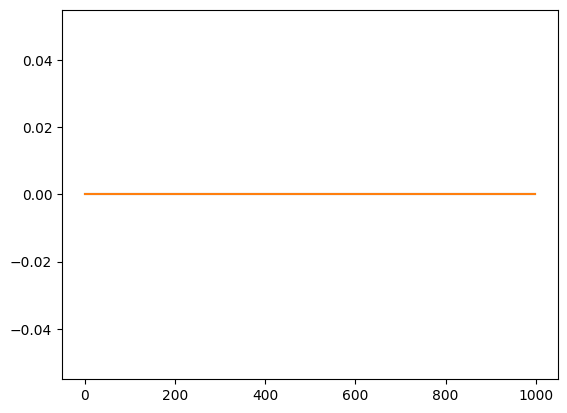

In [ ]:
dd= np.ones(1000)
ddr=  max_drawdown( Rp(datan, [0.05769231, 0.05769231,0.0833333333, 0.51923077, 0.05769231, 0.05769231,0.0833333333,0.0833333333]))
for i in range(1000):
  dd[i]= max_drawdown( Rp(datan, Pond(8)))
dd
fig,ax=plt.subplots()
ax.plot(dd)
ax.plot(np.ones(1000)*ddr)
plt.show()

In [ ]:
dod= np.ones(9)
dodr=  max_drawdown( Rp(datan, [0.07692308, 0.07692308, 0.30769231, 0.11538462, 0.26923077,
        0.03846154, 0.03846154, 0.07692308]))

for i in range(8):
  dod[i]=  max_drawdown( Rp(datan, np.eye(8)[i]))
dod[8]=dodr

pd.DataFrame(dod,index=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA","^IXIC", "^TNX","Portfolio"],columns=["MaxDrawDown"])

,MaxDrawDown
GOOGL,0.0
MSFT,0.0
GC=F,0.0
TSLA,0.0
AAPL,0.0
BABA,0.0
^IXIC,0.0
^TNX,0.0
Portfolio,0.0


In [37]:
def Matcov(resultat):
    sigma= resultat.cov()* np.sqrt(63)
    return sigma

def Pond(n):
    W=np.random.randint(1,10,n)  # Generation de n entiers compris entre 1 et 10
    W= W/np.sum(W) #  Normalisation pour aoir la somme de spondérations égale à 1
    return W
def PortfolioStat(data, sim=10000):
    resultat= data
    mu= resultat.mean() #  Rentabilité des actifs
    sigma= Matcov(resultat)  # Matrice de variance covariance des différents  actifs
    n= data.shape[1]
    W=np.zeros((sim,n))
    moy=np.zeros(sim)
    theta=np.zeros(sim)
    for i in range(sim):
        wi= Pond(n) # POndération de chaque portefeuille
        moy[i]= np.dot(wi,mu)   # Rentabilité espérée du portefeuille
        theta[i]  = np.dot(wi.T,np.dot(sigma, wi))   #Volatilité de chaque portefeuille
        W[i]= wi   # incrémenter au fur et à mesure une matrice des pondérations
         # incrémentation des moyennes
         # incrémentations des variances
    results= list()    #liste qui contiendra la matrice des pondérations, le vecteur rentabilité, et le vecteur variance pour chaque simulation
    results.append(W) 
    results.append(moy)
    results.append(theta)
    plt.scatter(results[2],results[1])

    return results

def MaxSharpeRate(portfolio, rf):
    max_= max((portfolio[1]-rf)/portfolio[2])
    index=np.where(((portfolio[1]-rf)/portfolio[2])==max_)
    return  [portfolio[0][index],portfolio[1][index],portfolio[2][index],max_]

def GMV(portfolio):
      min_ = min(portfolio[2])
      index= np.where(portfolio[2]==min_)
      return [portfolio[0][index],portfolio[1][index],portfolio[2][index]]

In [38]:
[0.15384615, 0.20512821, 0.05128205, ..., 0.1025641 , 0.12820513,
         0.07692308]

[0.15384615,
 0.20512821,
 0.05128205,
 Ellipsis,
 0.1025641,
 0.12820513,
 0.07692308]

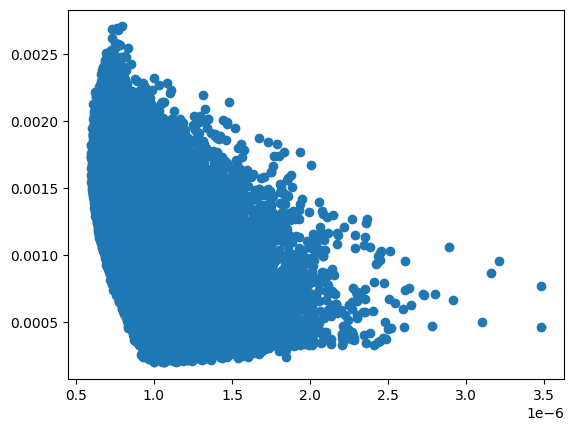

In [50]:
portfolio=PortfolioStat(datan, sim=100000)

In [52]:
rf=0.0006
print(MaxSharpeRate(portfolio, rf))
print(GMV(portfolio))

[array([[0.04166667, 0.04166667, 0.33333333, 0.08333333, 0.375     ,
        0.04166667, 0.08333333]]), array([0.00268003]), array([7.3034978e-07]), 2847.9872109561647]
[array([[0.09090909, 0.15151515, 0.21212121, 0.09090909, 0.24242424,
        0.12121212, 0.09090909]]), array([0.00172173]), array([5.93712038e-07])]
